# NEUROKIT 2

Weslley Lioba Caldas

# IMPORTS

In [2]:
import numpy as np
import pandas as pd
import neurokit2 as nk
import matplotlib.pyplot as plt
import math
import seaborn as sns


# Cardiac activity (ECG)

link: https://neuropsychology.github.io/NeuroKit/functions/ecg.html#ecg-process

# ecg_process()

ecg_process(ecg_signal, sampling_rate=1000, method='neurokit')

**Automated pipeline for preprocessing an ECG signal**


**Parameters**
* **ecg_signal** (Union[list, np.array, pd.Series]) – The raw ECG channel.

* **sampling_rate** (int) – The sampling frequency of ecg_signal (in Hz, i.e., samples/second). Defaults to 1000.

* **method** (str) – The processing pipeline to apply. Defaults to "neurokit".



**Returns**
* **signals** (DataFrame) – A DataFrame of the same length as the ecg_signal containing the following columns:

    * "ECG_Raw": the raw signal.

    * "ECG_Clean": the cleaned signal.

    * "ECG_R_Peaks": the R-peaks marked as “1” in a list of zeros.

    * "ECG_Rate": heart rate interpolated between R-peaks.

    * "ECG_P_Peaks": the P-peaks marked as “1” in a list of zeros

    * "ECG_Q_Peaks": the Q-peaks marked as “1” in a list of zeros .

    * "ECG_S_Peaks": the S-peaks marked as “1” in a list of zeros.

    



* **signals**

    * "ECG_T_Peaks": the T-peaks marked as “1” in a list of zeros.

    * "ECG_P_Onsets": the P-onsets marked as “1” in a list of zeros.

    * "ECG_P_Offsets": the P-offsets marked as “1” in a list of zeros (only when method in ecg_delineate() is wavelet).

    * "ECG_T_Onsets": the T-onsets marked as “1” in a list of zeros (only when method in ecg_delineate() is wavelet).
    
    * "ECG_T_Offsets": the T-offsets marked as “1” in a list of zeros.

    * "ECG_R_Onsets": the R-onsets marked as “1” in a list of zeros (only when method in ecg_delineate() is wavelet).

    * "ECG_R_Offsets": the R-offsets marked as “1” in a list of zeros (only when method in ecg_delineate() is wavelet).

* **signals**

    * "ECG_Phase_Atrial": cardiac phase, marked by “1” for systole and “0” for diastole.

    * "ECG_Phase_Ventricular": cardiac phase, marked by “1” for systole and “0” for diastole.

    * "ECG_Atrial_PhaseCompletion": cardiac phase (atrial) completion, expressed in percentage (from 0 to 1), representing the stage of the current cardiac phase.

    * "ECG_Ventricular_PhaseCompletion": cardiac phase (ventricular) completion, expressed in percentage (from 0 to 1), representing the stage of the current cardiac phase.

    * **This list is not up-to-date. Help us improve the documentation!**

* **info** (dict) – A dictionary containing the samples at which the R-peaks occur, accessible with the key "ECG_Peaks", as well as the signals’ sampling rate.

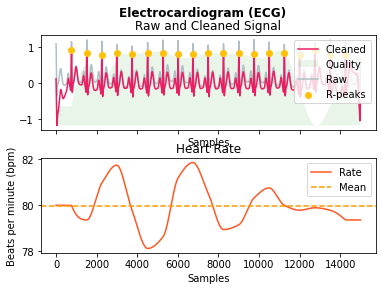

In [3]:
# Simulate ECG signal
ecg = nk.ecg_simulate(duration=15, sampling_rate=1000, heart_rate=80)

# Preprocess ECG signal
signals, info = nk.ecg_process(ecg, sampling_rate=1000)

# Visualize
nk.ecg_plot(signals)

# ecg_analyze()

ecg_analyze(data, sampling_rate=1000, method='auto')

Performs ECG analysis by computing relevant features and indices on either epochs (event-related analysis) or on longer periods of data (interval-related analysis), such as resting-state data.

**Parameters**
* **data** (Union[dict, pd.DataFrame]) – A dictionary of epochs, containing one DataFrame per epoch, usually obtained via epochs_create(), or a DataFrame containing all epochs, usually obtained via epochs_to_df(). Can also take a DataFrame of processed signals from a longer period of data, typically generated by ecg_process() or bio_process(). Can also take a dict containing sets of separate periods of data.

* **sampling_rate** (int) – The sampling frequency of the signal (in Hz, i.e., samples/second). Defaults to 1000Hz.



* **method** (str) – Can be one of "event-related" for event-related analysis on epochs, or "interval-related" for analysis on longer periods of data. Defaults to auto, where the method will be chosen based on the mean duration of the data ("event-related" for duration under 10s).

**Returns**
DataFrame – A dataframe containing the analyzed ECG features. If event-related analysis is conducted, each epoch is indicated by the Label column. See ecg_eventrelated() and ecg_intervalrelated() docstrings for details.

In [4]:
# Download the data
data = nk.data("bio_eventrelated_100hz")

# Process the data for event-related analysis
df, info = nk.bio_process(ecg=data["ECG"], sampling_rate=100)

events = nk.events_find(data["Photosensor"], threshold_keep='below',
                        event_conditions=["Negative", "Neutral", "Neutral", "Negative"])


epochs = nk.epochs_create(df, events, sampling_rate=100, epochs_start=-0.1, epochs_end=1.9)

# Analyze
analyze_epochs = nk.ecg_analyze(epochs, sampling_rate=100)

# Get a dataframe with all the results
analyze_epochs

C:\Users\Azzy\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:5239: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,Label,Condition,Event_Onset,ECG_Rate_Baseline,ECG_Rate_Max,ECG_Rate_Min,ECG_Rate_Mean,ECG_Rate_SD,ECG_Rate_Max_Time,ECG_Rate_Min_Time,ECG_Rate_Trend_Linear,ECG_Rate_Trend_Quadratic,ECG_Rate_Trend_R2,ECG_Phase_Atrial,ECG_Phase_Completion_Atrial,ECG_Phase_Ventricular,ECG_Phase_Completion_Ventricular,ECG_Quality_Mean
1,1,Negative,1024,58.962843,-0.034935,-3.875928,-2.279443,1.114000,0.010553,1.900000,-2.861522,-0.080625,0.999367,0.0,0.144578,1.0,0.400000,0.978231
2,2,Neutral,4957,64.000846,-0.056683,-5.177317,-3.690421,1.654065,0.010553,1.327136,-6.800245,0.283399,0.993256,0.0,0.880000,0.0,0.553846,0.912938
3,3,Neutral,9224,55.976284,4.674856,-1.922230,-0.282846,1.813644,1.900000,1.075879,-7.826192,0.941835,0.956162,0.0,0.044944,1.0,0.133333,0.919330
4,4,Negative,12984,57.505912,-0.010599,-3.800491,-1.378359,1.002110,0.010553,1.900000,-0.248683,-0.171035,0.990209,0.0,0.879518,0.0,0.575342,0.789760


In [5]:
# Download the resting-state data
data = nk.data("bio_resting_5min_100hz")

# Process the data
df, info = nk.ecg_process(data["ECG"], sampling_rate=100)

# Analyze
analyze_df = nk.ecg_analyze(df, sampling_rate=100)

# Get results
analyze_df

,ECG_Rate_Mean,HRV_MeanNN,HRV_SDNN,HRV_SDANN1,HRV_SDNNI1,HRV_SDANN2,HRV_SDNNI2,HRV_SDANN5,HRV_SDNNI5,HRV_RMSSD,...,HRV_SampEn,HRV_ShanEn,HRV_FuzzyEn,HRV_MSEn,HRV_CMSEn,HRV_RCMSEn,HRV_CD,HRV_HFD,HRV_KFD,HRV_LZC
0,86.392105,694.756381,49.036043,7.277185,48.83361,NaN,NaN,NaN,NaN,38.837766,...,1.978637,4.256941,1.268694,1.404138,1.469801,2.57268,1.832294,1.846507,2.722348,0.873124


# ecg_simulate()

ecg_simulate(duration=10, length=None, sampling_rate=1000, noise=0.01, heart_rate=70, heart_rate_std=1, method='ecgsyn', random_state=None, **kwargs)


Simulate an ECG/EKG signal: Generate an artificial (synthetic) ECG signal of a given duration and sampling rate using either the ECGSYN dynamical model (McSharry et al., 2003) or a simpler model based on Daubechies wavelets to roughly approximate cardiac cycles.

**Parameters**
* **duration** (int) – Desired recording length in seconds.

* **sampling_rate** (int) – The desired sampling rate (in Hz, i.e., samples/second).

* **length** (int) – The desired length of the signal (in samples).

* **noise** (float) – Noise level (amplitude of the laplace noise).



* **heart_rate** (int) – Desired simulated heart rate (in beats per minute). The default is 70. Note that for the "ECGSYN" method, random fluctuations are to be expected to mimick a real heart rate. These fluctuations can cause some slight discrepancies between the requested heart rate and the empirical heart rate, especially for shorter signals.

* **heart_rate_std** (int) – Desired heart rate standard deviation (beats per minute).

* **method** (str) – The model used to generate the signal. Can be "simple" for a simulation based on Daubechies wavelets that roughly approximates a single cardiac cycle. If "ecgsyn" (default), will use the model desbribed McSharry et al. (2003). If "multileads", will return a DataFrame containing 12-leads (see 12-leads ECG simulation).

* **random_state** (int) – Seed for the random number generator.

* ** **kwargs** – Other keywords parameters for ECGSYN algorithm, such as "lfhfratio", "ti", "ai", "bi".

**Returns**
array – Vector containing the ECG signal.

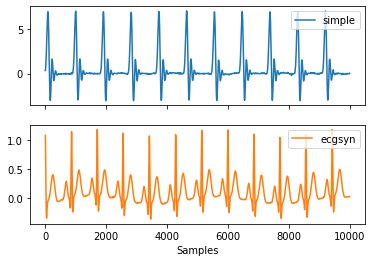

In [6]:
#
# simulando
ecg1 = nk.ecg_simulate(duration=10, method="simple")

ecg2 = nk.ecg_simulate(duration=10, method="ecgsyn")

# Visualize result
nk.signal_plot([ecg1, ecg2], labels=["simple", "ecgsyn"], subplots=True)

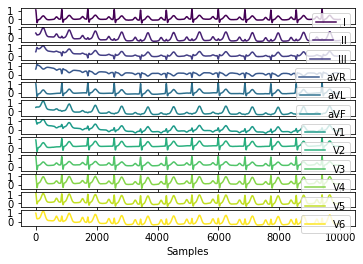

In [7]:
ecg12 = nk.ecg_simulate(duration=10, method="multileads")

# Visualize result
nk.signal_plot(ecg12, subplots=True)

# ecg_plot() 
ecg_plot(ecg_signals, rpeaks=None, sampling_rate=None, show_type='default')

**Visualize ECG data**

Plot ECG signals and R-peaks.

**Parameters**
* **ecg_signals** (DataFrame) – DataFrame obtained from ecg_process().

* **rpeaks** (dict) – The samples at which the R-peak occur. Dict returned by ecg_process(). Defaults to None.

* **sampling_rate** (int) – The sampling frequency of the ECG (in Hz, i.e., samples/second). Needs to be supplied if the data should be plotted over time in seconds. Otherwise the data is plotted over samples. Defaults to None. Must be specified to plot artifacts.

* **show_type** (str) – Visualize the ECG data with "default" or visualize artifacts thresholds with "artifacts" produced by ecg_fixpeaks(), or "full" to visualize both.

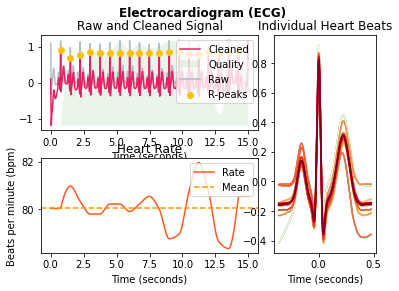

In [8]:
# Simulate data
ecg = nk.ecg_simulate(duration=15, sampling_rate=1000, heart_rate=80)

# Process signal
signals, info = nk.ecg_process(ecg, sampling_rate=1000)

# Plot
nk.ecg_plot(signals, sampling_rate=1000, show_type='default')

# ecg_clean()

ecg_clean(ecg_signal, sampling_rate=1000, method='neurokit', **kwargs)

**ECG Signal Cleaning**

Clean an ECG signal to remove noise and improve peak-detection accuracy. Different cleaning method are implemented.

* 'neurokit' (default): 0.5 Hz high-pass butterworth filter (order = 5), followed by powerline filtering (see signal_filter()). By default, powerline = 50.

* 'biosppy': Same as in the biosppy package. Please help providing a better description!

* 'pantompkins1985': Method used in Pan & Tompkins (1985). Please help providing a better description!

* 'hamilton2002': Method used in Hamilton (2002). Please help providing a better description!

* 'elgendi2010': Method used in Elgendi et al. (2010). Please help providing a better description!



* 'engzeemod2012': Method used in Engelse & Zeelenberg (1979). Please help providing a better description!

**Parameters**
* **ecg_signal** (Union[list, np.array, pd.Series]) – The raw ECG channel.

* **sampling_rate** (int) – The sampling frequency of ecg_signal (in Hz, i.e., samples/second). Defaults to 1000.

* **method** (str) – The processing pipeline to apply. Can be one of "neurokit" (default), "biosppy", "pantompkins1985", "hamilton2002", "elgendi2010", "engzeemod2012".

* ** **kwargs** – Other arguments to be passed to specific methods.

**Returns**
array – Vector containing the cleaned ECG signal.

<AxesSubplot:>

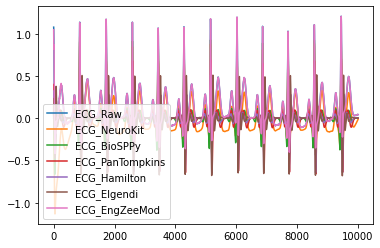

In [9]:
ecg = nk.ecg_simulate(duration=10, sampling_rate=1000)

signals = pd.DataFrame({"ECG_Raw" : ecg,
                        "ECG_NeuroKit" : nk.ecg_clean(ecg, sampling_rate=1000, method="neurokit"),
                        "ECG_BioSPPy" : nk.ecg_clean(ecg, sampling_rate=1000, method="biosppy"),
                        "ECG_PanTompkins" : nk.ecg_clean(ecg, sampling_rate=1000, method="pantompkins1985"),
                        "ECG_Hamilton" : nk.ecg_clean(ecg, sampling_rate=1000, method="hamilton2002"),
                        "ECG_Elgendi" : nk.ecg_clean(ecg, sampling_rate=1000, method="elgendi2010"),
                        "ECG_EngZeeMod" : nk.ecg_clean(ecg, sampling_rate=1000, method="engzeemod2012")})


signals.plot()


# ecg_quality()

ecg_quality(ecg_cleaned, rpeaks=None, sampling_rate=1000, method='averageQRS', approach=None)

**ECG Signal Quality Assessment**

Assess the quality of the ECG Signal using various methods:

* The "averageQRS" method computes a continuous index of quality of the ECG signal, by interpolating the distance of each QRS segment from the average QRS segment present in the * data. This index is therefore relative: 1 corresponds to heartbeats that are the closest to the average sample and 0 corresponds to the most distant heartbeat from that average sample. Note that 1 does not necessarily means “good”: if the majority of samples are bad, than being close to the average will likely mean bad as well. Use this index with care and plot it alongside your ECG signal to see if it makes sense.


* The "zhao2018" method (Zhao et al., 2018) extracts several signal quality indexes (SQIs): QRS wave power spectrum distribution pSQI, kurtosis kSQI, and baseline relative power basSQI. An additional R peak detection match qSQI was originally computed in the paper but left out in this algorithm. The indices were originally weighted with a ratio of [0.4, 0.4, 0.1, 0.1] to generate the final classification outcome, but because qSQI was dropped, the weights have been rearranged to [0.6, 0.2, 0.2] for pSQI, kSQI and basSQI respectively.


**Parameters**
* **ecg_cleaned** (Union[list, np.array, pd.Series]) – The cleaned ECG signal in the form of a vector of values.
* **rpeaks** (tuple or list) – The list of R-peak samples returned by ecg_peaks(). If None, peaks is computed from the signal input.
* **sampling_rate** (int) – The sampling frequency of the signal (in Hz, i.e., samples/second).
* **method (str)** – The method for computing ECG signal quality, can be "averageQRS" (default) or "zhao2018".
* **approach (str)** – The data fusion approach as documented in Zhao et al. (2018). Can be "simple" or "fuzzy". The former performs simple heuristic fusion of SQIs and the latter performs fuzzy comprehensive evaluation. If None (default), simple heuristic fusion is used.
* ** **kwargs** – Keyword arguments to be passed to signal_power() in the computation of basSQI and pSQI.

**Returns**
array or str – Vector containing the quality index ranging from 0 to 1 for "averageQRS" method, returns string classification (Unacceptable, Barely Acceptable or Excellent) of the signal for "zhao2018 method".

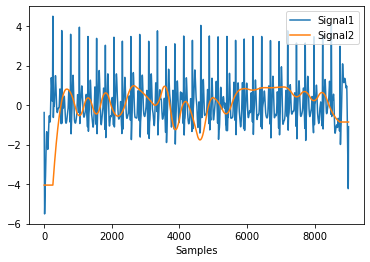

In [10]:
ecg = nk.ecg_simulate(duration=30, sampling_rate=300, noise=0.2)

ecg_cleaned = nk.ecg_clean(ecg, sampling_rate=300)

quality = nk.ecg_quality(ecg_cleaned, sampling_rate=300)

nk.signal_plot([ecg_cleaned, quality], standardize=True)

In [11]:
nk.ecg_quality(ecg_cleaned,
               sampling_rate=300,
               method="zhao2018",
               approach="fuzzy")

'Barely acceptable'

# ecg_rsp()
ecg_rsp(ecg_rate, sampling_rate=1000, method='vangent2019')

**ECG-Derived Respiration (EDR)**

Extract ECG-Derived Respiration (EDR), a proxy of a respiratory signal based on heart rate.

Different methods include:

* **vangent2019**: 0.1-0.4 Hz filter.

* **soni2019**: 0-0.5 Hz filter.

* **charlton2016**: 0.066-1 Hz filter.

* **sarkar2015**: 0.1-0.7 Hz filter.

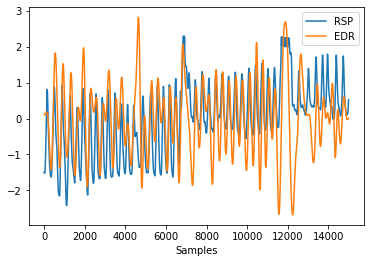

In [12]:
# Get heart rate
data = nk.data("bio_eventrelated_100hz")

rpeaks, info = nk.ecg_peaks(data["ECG"], sampling_rate=100)

ecg_rate = nk.signal_rate(rpeaks, sampling_rate=100, desired_length=len(rpeaks))

# Get ECG Derived Respiration (EDR) and add to the data
data["EDR"] = nk.ecg_rsp(ecg_rate, sampling_rate=100)

# Visualize result
nk.signal_plot([data["RSP"], data["EDR"]], standardize = True)

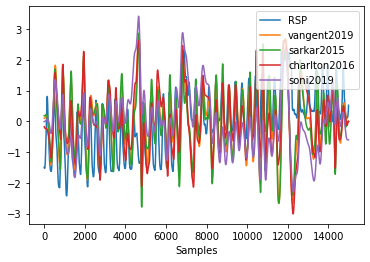

In [13]:
data["vangent2019"] = nk.ecg_rsp(ecg_rate, sampling_rate=100, method="vangent2019")

data["sarkar2015"] = nk.ecg_rsp(ecg_rate, sampling_rate=100, method="sarkar2015")

data["charlton2016"] = nk.ecg_rsp(ecg_rate, sampling_rate=100, method="charlton2016")

data["soni2019"] = nk.ecg_rsp(ecg_rate, sampling_rate=100, method="soni2019")

# Visualize results
nk.signal_plot([data["RSP"], data["vangent2019"], data["sarkar2015"],
                data["charlton2016"], data["soni2019"]], standardize = True)

# ecg_peaks()
ecg_peaks(ecg_cleaned, sampling_rate=1000, method='neurokit', correct_artifacts=False, **kwargs)

**Find R-peaks in an ECG signal**

Find R-peaks in an ECG signal using the specified method. The method accepts unfiltered ECG signals as input, although it is expected that a filtered (cleaned) ECG will result in better results.

Different algorithms for peak-detection include:


* **neurokit** (default): QRS complexes are detected based on the steepness of the absolute gradient of the ECG signal. Subsequently, R-peaks are detected as local maxima in the QRS complexes. Unpublished, but see https://github.com/neuropsychology/NeuroKit/issues/476

* **pantompkins1985**: Algorithm by Pan & Tompkins (1985).

* **hamilton2002**: Algorithm by Hamilton (2002).

* **zong2003**: Algorithm by Zong et al. (2003).



* **martinez2004**: Algorithm by Martinez et al (2004).

* **christov2004**: Algorithm by Christov (2004).

* **gamboa2008**: Algorithm by Gamboa (2008).

* **elgendi2010**: Algorithm by Elgendi et al. (2010).

* **engzeemod2012**: Original algorithm by Engelse & Zeelenberg (1979) modified by Lourenço et al. (2012).

* **kalidas2017**: Algorithm by Kalidas et al. (2017).

* **nabian2018**: Algorithm by Nabian et al. (2018) based on the Pan-Tompkins algorithm.

* **rodrigues2021**: Adaptation of the work by Sadhukhan & Mitra (2012) and Gutiérrez-Rivas et al. (2015) by Rodrigues et al. (2021).

* **promac**: ProMAC combines the result of several R-peak detectors in a probabilistic way. For a given peak detector, the binary signal representing the peak locations is convolved with a Gaussian distribution, resulting in a probabilistic representation of each peak location. This procedure is repeated for all selected methods and the resulting signals are accumulated. Finally, a threshold is used to accept or reject the peak locations. See this discussion for more information on the origins of the method: https://github.com/neuropsychology/NeuroKit/issues/222



**Parameters**
* **ecg_cleaned** (Union[list, np.array, pd.Series]) – The cleaned ECG channel as returned by ecg_clean().
* **sampling_rate** (int) – The sampling frequency of ecg_signal (in Hz, i.e., samples/second). Defaults to 1000.
* **method** (string) – The algorithm to be used for R-peak detection.
* **correct_artifacts** (bool) – Whether or not to first identify and fix artifacts, using the method by Lipponen & Tarvainen (2019).
* ** **kwargs** – Additional keyword arguments, usually specific for each method.

**Returns**
* **signals** (DataFrame) – A DataFrame of same length as the input signal in which occurrences of R-peaks marked as 1 in a list of zeros with the same length as ecg_cleaned. Accessible with the keys "ECG_R_Peaks".
* **info** (dict) – A dictionary containing additional information, in this case the samples at which R-peaks occur, accessible with the key "ECG_R_Peaks", as well as the signals’ sampling rate, accessible with the key "sampling_rate".

### Example 1: Find R-peaks using the default method ("neurokit").

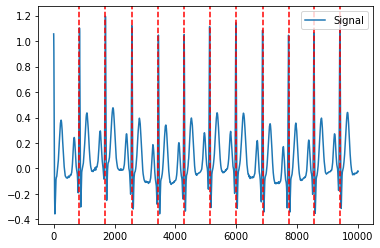

In [14]:
ecg = nk.ecg_simulate(duration=10, sampling_rate=1000)

signals, info = nk.ecg_peaks(ecg, correct_artifacts=True)

nk.events_plot(info["ECG_R_Peaks"], ecg)

### Example 2: Compare different methods

In [15]:
# neurokit (default)
cleaned = nk.ecg_clean(ecg, method="neurokit")
_, neurokit = nk.ecg_peaks(cleaned, method="neurokit")

# pantompkins1985
cleaned = nk.ecg_clean(ecg, method="pantompkins1985")
_, pantompkins1985 = nk.ecg_peaks(cleaned, method="pantompkins1985")

# nabian2018
_, nabian2018 = nk.ecg_peaks(ecg, method="nabian2018")

# hamilton2002
cleaned = nk.ecg_clean(ecg, method="hamilton2002")
_, hamilton2002 = nk.ecg_peaks(cleaned, method="hamilton2002")

# martinez2004
_, martinez2004 = nk.ecg_peaks(ecg, method="martinez2004")

# zong2003
_, zong2003 = nk.ecg_peaks(ecg, method="zong2003")

# christov2004
_, christov2004 = nk.ecg_peaks(cleaned, method="christov2004")

# gamboa2008
cleaned = nk.ecg_clean(ecg, method="gamboa2008")
_, gamboa2008 = nk.ecg_peaks(cleaned, method="gamboa2008")





In [ ]:
# elgendi2010
cleaned = nk.ecg_clean(ecg, method="elgendi2010")
_, elgendi2010 = nk.ecg_peaks(cleaned, method="elgendi2010")

# engzeemod2012
cleaned = nk.ecg_clean(ecg, method="engzeemod2012")
_, engzeemod2012 = nk.ecg_peaks(cleaned, method="engzeemod2012")

# kalidas2017
cleaned = nk.ecg_clean(ecg, method="kalidas2017")
_, kalidas2017 = nk.ecg_peaks(cleaned, method="kalidas2017")

# rodrigues2021
_, rodrigues2021 = nk.ecg_peaks(ecg, method="rodrigues2021")

In [23]:
# Collect all R-peak lists by iterating through the result dicts
rpeaks = [
    i["ECG_R_Peaks"]
    for i in [
        neurokit,
        pantompkins1985,
        nabian2018,
        hamilton2002,
        martinez2004,
        christov2004,
        gamboa2008,
        elgendi2010,
        engzeemod2012,
        kalidas2017,
        rodrigues2021,
    ]
]


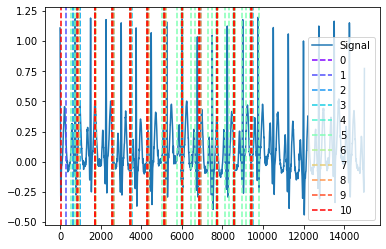

In [24]:
# Visualize results
nk.events_plot(rpeaks, ecg)

### Example 3: Method-agreement procedure (‘promac’)

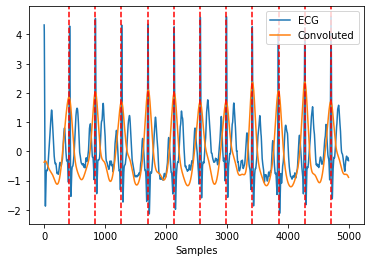

In [17]:
ecg = nk.ecg_simulate(duration=10, sampling_rate=500)

ecg = nk.signal_distort(ecg,
                        sampling_rate=500,
                        noise_amplitude=0.05, noise_frequency=[25, 50],
                        artifacts_amplitude=0.05, artifacts_frequency=50)


info = nk.ecg_findpeaks(ecg, sampling_rate=500, method="promac", show=True)

# ecg_delineate()

ecg_delineate(ecg_cleaned, rpeaks=None, sampling_rate=1000, method='dwt', show=False, show_type='peaks', check=False, **kwargs)

**Delineate QRS complex**

Function to delineate the QRS complex, i.e., the different waves of the cardiac cycles. A typical ECG heartbeat consists of a P wave, a QRS complex and a T wave. The P wave represents the wave of depolarization that spreads from the SA-node throughout the atria. The QRS complex reflects the rapid depolarization of the right and left ventricles. Since the ventricles are the largest part of the heart, in terms of mass, the QRS complex usually has a much larger amplitude than the P-wave. The T wave represents the ventricular repolarization of the ventricles.On rare occasions, a U wave can be seen following the T wave. The U wave is believed to be related to the last remnants of ventricular repolarization.



**Parameters**
* **ecg_cleaned** (Union[list, np.array, pd.Series]) – The cleaned ECG channel as returned by ecg_clean().
* **rpeaks** (Union[list, np.array, pd.Series]) – The samples at which R-peaks occur. Accessible with the key “ECG_R_Peaks” in the info dictionary returned by ecg_findpeaks().
* **sampling_rate** (int) – The sampling frequency of ecg_signal (in Hz, i.e., samples/second). Defaults to 1000.
* **method** (str) – Can be one of "peak" for a peak-based method, "cwt" for continuous wavelet transform or "dwt" (default) for discrete wavelet transform.
* **show** (bool) – If True, will return a plot to visualizing the delineated waves information.
* **show_type** (str) – The type of delineated waves information showed in the plot. Can be "peaks", "bounds_R", "bounds_T", "bounds_P" or "all".
* **check** (bool) – Defaults to False. If True, replaces the delineated features with np.nan if its standardized distance from R-peaks is more than 3.
* ** **kwargs** – Other optional arguments.



**Returns**
* **waves** (dict) – A dictionary containing additional information. For derivative method, the dictionary contains the samples at which P-peaks, Q-peaks, S-peaks, T-peaks, P-onsets and T-offsets occur, accessible with the keys "ECG_P_Peaks", "ECG_Q_Peaks", "ECG_S_Peaks", "ECG_T_Peaks", "ECG_P_Onsets", "ECG_T_Offsets", respectively.

For wavelet methods, in addition to the above information, the dictionary contains the samples at which QRS-onsets and QRS-offsets occur, accessible with the key "ECG_P_Peaks", "ECG_T_Peaks", "ECG_P_Onsets", "ECG_P_Offsets", "ECG_Q_Peaks", "ECG_S_Peaks", "ECG_T_Onsets", "ECG_T_Offsets", "ECG_R_Onsets", "ECG_R_Offsets", respectively.

* **signals** (DataFrame) – A DataFrame of same length as the input signal in which occurrences of peaks, onsets and offsets marked as “1” in a list of zeros.

In [18]:
#step 1:  Delineate
# Simulate ECG signal
ecg = nk.ecg_simulate(duration=10, sampling_rate=1000)

# Get R-peaks location
_, rpeaks = nk.ecg_peaks(ecg, sampling_rate=1000)

# Delineate cardiac cycle
signals, waves = nk.ecg_delineate(ecg, rpeaks, sampling_rate=1000)

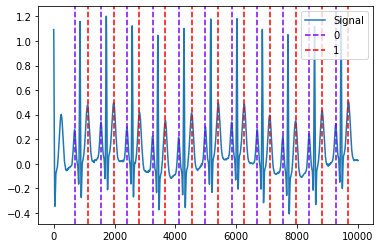

In [19]:
#Step 2. Plot P-Peaks and T-Peaks

nk.events_plot([waves["ECG_P_Peaks"], waves["ECG_T_Peaks"]], ecg)

# ecg_phase()
ecg_phase(ecg_cleaned, rpeaks=None, delineate_info=None, sampling_rate=None)

**Find the Cardiac Phase**

Compute cardiac phase (for both atrial and ventricular), labelled as 1 for systole and 0 for diastole.

**Parameters**
* **ecg_cleaned** (Union[list, np.array, pd.Series]) – The cleaned ECG channel as returned by ecg_clean().

* **rpeaks** (list or array or DataFrame or Series or dict) – The samples at which the different ECG peaks occur. If a dict or a DataFrame is passed, it is assumed that these containers were obtained with ecg_findpeaks() or ecg_peaks().

* **delineate_info** (dict) – A dictionary containing additional information of ecg delineation and can be obtained with ecg_delineate().

* **sampling_rate** (int) – The sampling frequency of ecg_signal (in Hz, i.e., samples/second). Defaults to None.



**Returns**
* **signals** (DataFrame) – A DataFrame of same length as ecg_signal containing the following columns:

    * **"ECG_Phase_Atrial"**: cardiac phase, marked by “1” for systole and “0” for diastole.

    * **"ECG_Phase_Completion_Atrial"**: cardiac phase (atrial) completion, expressed in percentage (from 0 to 1), representing the stage of the current cardiac phase.

    * **"ECG_Phase_Ventricular"**: cardiac phase, marked by “1” for systole and “0” for diastole.

    * **"ECG_Phase_Completion_Ventricular"**: cardiac phase (ventricular) completion, expressed in percentage (from 0 to 1), representing the stage of the current cardiac phase.

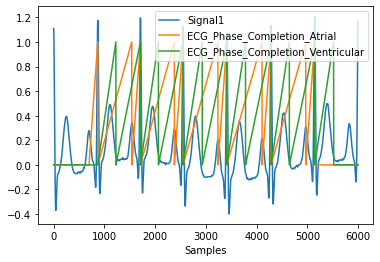

In [20]:
ecg = nk.ecg_simulate(duration=6, sampling_rate=1000)

_, rpeaks = nk.ecg_peaks(ecg)

signals, waves = nk.ecg_delineate(ecg, rpeaks, sampling_rate=1000)

cardiac_phase = nk.ecg_phase(ecg_cleaned=ecg, rpeaks=rpeaks,
                             delineate_info=waves, sampling_rate=1000)


nk.signal_plot([ecg, cardiac_phase], standardize=True)

# ecg_rate()
ecg_rate(peaks, sampling_rate=1000, desired_length=None, interpolation_method='monotone_cubic')

**Compute Signal Rate**

Calculate signal rate (per minute) from a series of peaks. It is a general function that works for any series of peaks (i.e., not specific to a particular type of signal). It is computed as 60 / period, where the period is the time between the peaks (see func:.signal_period).

**Parameters**
* **peaks** (Union[list, np.array, pd.DataFrame, pd.Series, dict]) – The samples at which the peaks occur. If an array is passed in, it is assumed that it was obtained with signal_findpeaks(). If a DataFrame is passed in, it is assumed it is of the same length as the input signal in which occurrences of R-peaks are marked as “1”, with such containers obtained with e.g., :func:.`ecg_findpeaks` or rsp_findpeaks().

* **sampling_rate** (int) – The sampling frequency of the signal that contains peaks (in Hz, i.e., samples/second). Defaults to 1000.



* **desired_length** (int) – If left at the default None, the returned rated will have the same number of elements as peaks. If set to a value larger than the sample at which the last peak occurs in the signal (i.e., peaks[-1]), the returned rate will be interpolated between peaks over desired_length samples. To interpolate the rate over the entire duration of the signal, set desired_length to the number of samples in the signal. Cannot be smaller than or equal to the sample at which the last peak occurs in the signal. Defaults to None.

* **interpolation_method** (str) – Method used to interpolate the rate between peaks. See signal_interpolate(). "monotone_cubic" is chosen as the default interpolation method since it ensures monotone interpolation between data points (i.e., it prevents physiologically implausible “overshoots” or “undershoots” in the y-direction). In contrast, the widely used cubic spline interpolation does not ensure monotonicity.

**Returns**
array – A vector containing the rate (peaks per minute).

In [25]:
# Create signal of varying frequency
freq = nk.signal_simulate(2, frequency = 1)

signal = np.sin((freq).cumsum() * 0.5)

# Find peaks
info = nk.signal_findpeaks(signal)

# Compute rate using 2 methods
rate1 = nk.signal_rate(peaks=info["Peaks"],
                       desired_length=len(signal),
                       interpolation_method="nearest")


rate2 = nk.signal_rate(peaks=info["Peaks"],
                       desired_length=len(signal),
                       interpolation_method="monotone_cubic")




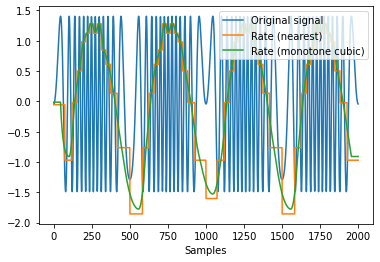

In [26]:
# Visualize signal and rate on the same scale
nk.signal_plot([signal, rate1, rate2],
               labels = ["Original signal", "Rate (nearest)", "Rate (monotone cubic)"],
               standardize = True)

# ecg_segment()
ecg_segment(ecg_cleaned, rpeaks=None, sampling_rate=1000, show=False)

**Segment an ECG signal into single heartbeats**

Segment an ECG signal into single heartbeats. Convenient for visualizing all the heart beats.

**Parameters**
* **ecg_cleaned** (Union[list, np.array, pd.Series]) – The cleaned ECG channel as returned by ecg_clean().

* **rpeaks** (dict) – The samples at which the R-peaks occur. Dict returned by ecg_peaks(). Defaults to None.

* **sampling_rate** (int) – The sampling frequency of ecg_signal (in Hz, i.e., samples/second). Defaults to 1000.

* **show** (bool) – If True, will return a plot of heartbeats. Defaults to False.

**Returns**
dict – A dict containing DataFrames for all segmented heartbeats.

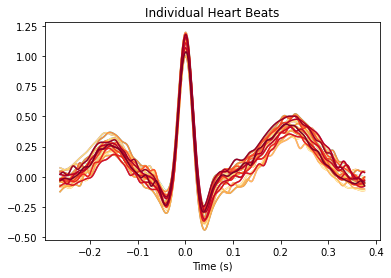

In [22]:
ecg = nk.ecg_simulate(duration=15, sampling_rate=1000, heart_rate=80, noise = 0.05)

qrs_epochs = nk.ecg_segment(ecg, rpeaks=None, sampling_rate=1000, show=True)

# ecg_eventrelated()
ecg_eventrelated(epochs, silent=False)

**Event-related analysis of ECG**

Performs event-related ECG analysis on epochs containing ECG signals.

**Parameters**
* **epochs** (Union[dict, pd.DataFrame]) – A dict containing one DataFrame per event/trial, usually obtained via epochs_create(), or a DataFrame containing all epochs, usually obtained via epochs_to_df().

* **silent** (bool) – If True, silence possible warnings.

**Returns**
DataFrame – A dataframe containing the analyzed ECG features for each epoch, with each epoch indicated by the Label column (if not present, by the Index column). The analyzed features consist of the following:

* **ECG_Rate_Max**: the maximum heart rate after stimulus onset.



* **ECG_Rate_Min**: the minimum heart rate after stimulus onset.

* **ECG_Rate_Mean**: the mean heart rate after stimulus onset.

* **ECG_Rate_SD**: the standard deviation of the heart rate after stimulus onset.

* **ECG_Rate_Max_Time**: the time at which maximum heart rate occurs.

* **ECG_Rate_Min_Time**: the time at which minimum heart rate occurs.

* **ECG_Phase_Atrial**: indication of whether the onset of the event concurs with respiratory systole (1) or diastole (0).

* **ECG_Phase_Ventricular**: indication of whether the onset of the event concurs with respiratory systole (1) or diastole (0).

* **ECG_Phase_Atrial_Completion**: indication of the stage of the current cardiac (atrial) phase (0 to 1) at the onset of the event.

* **ECG_Phase_Ventricular_Completion**: indication of the stage of the current cardiac (ventricular) phase (0 to 1) at the onset of the event.



We also include the following experimental features related to the parameters of a quadratic model:

* **ECG_Rate_Trend_Linear**: The parameter corresponding to the linear trend.

* **ECG_Rate_Trend_Quadratic**: The parameter corresponding to the curvature.

* **ECG_Rate_Trend_R2**: the quality of the quadratic model. If too low, the parameters might not be reliable or meaningful.

### Example 1: Simulated Data

In [26]:
# Simulate ECG signal
signal = nk.ecg_simulate(duration=20)

# Preprocess
ecg, info = nk.ecg_process(signal)

# Create epochs
epochs = nk.epochs_create(ecg, events=[5000, 10000, 15000],
                          epochs_start=-0.1, epochs_end=1.9)


nk.ecg_eventrelated(epochs)

C:\Users\Azzy\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:5239: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,Label,Event_Onset,ECG_Rate_Baseline,ECG_Rate_Max,ECG_Rate_Min,ECG_Rate_Mean,ECG_Rate_SD,ECG_Rate_Max_Time,ECG_Rate_Min_Time,ECG_Rate_Trend_Linear,ECG_Rate_Trend_Quadratic,ECG_Rate_Trend_R2,ECG_Phase_Atrial,ECG_Phase_Completion_Atrial,ECG_Phase_Ventricular,ECG_Phase_Completion_Ventricular,ECG_Quality_Mean
1,1,5000,70.820821,-0.000660,-1.295907,-0.827714,0.421653,0.001051,1.821961,-1.461422,0.107291,0.995942,1.0,0.426901,0.0,0.797938,0.989182
2,2,10000,68.972140,2.447388,0.000732,1.329483,0.828371,1.900000,0.001051,2.021927,-0.258071,0.986829,0.0,0.838897,0.0,0.414634,0.947173
3,3,15000,71.080290,0.518755,-2.253397,-0.310548,0.822848,0.391246,1.900000,1.172407,0.171869,0.995553,0.0,0.671171,0.0,0.189189,0.944272


### Example 2: Real Data

In [27]:
# Download real dataset
data = nk.data("bio_eventrelated_100hz")

# Process the data
df, info = nk.bio_process(ecg=data["ECG"], sampling_rate=100)

events = nk.events_find(data["Photosensor"],
                        threshold_keep='below',
                        event_conditions=["Negative", "Neutral",
                                          "Neutral", "Negative"])


epochs = nk.epochs_create(df, events, sampling_rate=100,
                          epochs_start=-0.1, epochs_end=1.9)


nk.ecg_eventrelated(epochs)

C:\Users\Azzy\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:5239: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,Label,Condition,Event_Onset,ECG_Rate_Baseline,ECG_Rate_Max,ECG_Rate_Min,ECG_Rate_Mean,ECG_Rate_SD,ECG_Rate_Max_Time,ECG_Rate_Min_Time,ECG_Rate_Trend_Linear,ECG_Rate_Trend_Quadratic,ECG_Rate_Trend_R2,ECG_Phase_Atrial,ECG_Phase_Completion_Atrial,ECG_Phase_Ventricular,ECG_Phase_Completion_Ventricular,ECG_Quality_Mean
1,1,Negative,1024,58.962843,-0.034935,-3.875928,-2.279443,1.114000,0.010553,1.900000,-2.861522,-0.080625,0.999367,0.0,0.144578,1.0,0.400000,0.978231
2,2,Neutral,4957,64.000846,-0.056683,-5.177317,-3.690421,1.654065,0.010553,1.327136,-6.800245,0.283399,0.993256,0.0,0.880000,0.0,0.553846,0.912938
3,3,Neutral,9224,55.976284,4.674856,-1.922230,-0.282846,1.813644,1.900000,1.075879,-7.826192,0.941835,0.956162,0.0,0.044944,1.0,0.133333,0.919330
4,4,Negative,12984,57.505912,-0.010599,-3.800491,-1.378359,1.002110,0.010553,1.900000,-0.248683,-0.171035,0.990209,0.0,0.879518,0.0,0.575342,0.789760


# ecg_intervalrelated()
ecg_intervalrelated(data, sampling_rate=1000)

**Interval-related analysis of ECG**

Performs ECG analysis on longer periods of data (typically > 10 seconds), such as resting-state data.

**Parameters**
* **data** (Union[dict, pd.DataFrame]) – A DataFrame containing the different processed signal(s) as different columns, typically generated by ecg_process() or bio_process(). Can also take a dict containing sets of separately processed DataFrames.
* **sampling_rate** (int) – The sampling frequency of the signal (in Hz, i.e., samples/second). Defaults to 1000Hz.

**Returns**
DataFrame – A dataframe containing the analyzed ECG features. The analyzed features consist of the following:
* **ECG_Rate_Mean**: the mean heart rate.
* **ECG_HRV**: the different heart rate variability metrices.

See hrv_summary() docstrings for details.

In [31]:
# Download data
data = nk.data("bio_resting_5min_100hz")

# Process the data
df, info = nk.ecg_process(data["ECG"], sampling_rate=100)

# Single dataframe is passed
nk.ecg_intervalrelated(df, sampling_rate=100)



,ECG_Rate_Mean,HRV_MeanNN,HRV_SDNN,HRV_SDANN1,HRV_SDNNI1,HRV_SDANN2,HRV_SDNNI2,HRV_SDANN5,HRV_SDNNI5,HRV_RMSSD,...,HRV_SampEn,HRV_ShanEn,HRV_FuzzyEn,HRV_MSEn,HRV_CMSEn,HRV_RCMSEn,HRV_CD,HRV_HFD,HRV_KFD,HRV_LZC
0,86.392105,694.756381,49.036043,7.277185,48.83361,NaN,NaN,NaN,NaN,38.837766,...,1.978637,4.256941,1.268694,1.404138,1.469801,2.57268,1.832294,1.846507,2.722348,0.873124


In [32]:
epochs = nk.epochs_create(df, events=[0, 15000], sampling_rate=100, epochs_end=150)

nk.ecg_intervalrelated(epochs)

C:\Users\Azzy\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:5239: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,Label,ECG_Rate_Mean,HRV_MeanNN,HRV_SDNN,HRV_SDANN1,HRV_SDNNI1,HRV_SDANN2,HRV_SDNNI2,HRV_SDANN5,HRV_SDNNI5,...,HRV_SampEn,HRV_ShanEn,HRV_FuzzyEn,HRV_MSEn,HRV_CMSEn,HRV_RCMSEn,HRV_CD,HRV_HFD,HRV_KFD,HRV_LZC
1,1,86.389814,69.497674,5.167181,NaN,NaN,NaN,NaN,NaN,NaN,...,1.252763,4.290505,1.166763,1.323430,1.334030,1.573050,1.653578,1.803504,2.33683,0.828876
2,2,86.394396,69.460465,4.648090,NaN,NaN,NaN,NaN,NaN,NaN,...,1.881786,4.080222,1.347346,1.737149,1.497679,1.957806,1.536938,1.895279,3.09411,0.973029


# ecg_findpeaks()
ecg_findpeaks(ecg_cleaned, sampling_rate=1000, method='neurokit', show=False, **kwargs)

**Locate R-peaks**

Low-level function used by ecg_peaks() to identify R-peaks in an ECG signal using a different set of algorithms. Use the main function and see its documentation for details.

**Parameters**
* **ecg_cleaned** (Union[list, np.array, pd.Series]) – See ecg_peaks().
* **sampling_rate** (int) – See ecg_peaks().
* **method** (string) – See ecg_peaks().
* **show** (bool) – If True, will return a plot to visualizing the thresholds used in the algorithm. Useful for debugging.
* ** **kwargs** – Additional keyword arguments, usually specific for each method.

**Returns**
info (dict) – A dictionary containing additional information, in this case the samples at which R-peaks occur, accessible with the key "ECG_R_Peaks".

# ecg_invert()
ecg_invert(ecg_signal, sampling_rate=1000, force=False, show=False)

**ECG signal inversion**

Checks whether an ECG signal is inverted, and if so, corrects for this inversion. To automatically detect the inversion, the ECG signal is cleaned, the mean is subtracted, and with a rolling window of 2 seconds, the original value corresponding to the maximum of the squared signal is taken. If the median of these values is negative, it is assumed that the signal is inverted.

**Parameters**

* **ecg_signal** (Union[list, np.array, pd.Series]) – The raw ECG channel.

* **sampling_rate** (int) – The sampling frequency of ecg_signal (in Hz, i.e., samples/second). Defaults to 1000.

* **force** (bool) – Whether to force inversion of the signal regardless of whether it is detected as inverted. The default is False.

* **show** (bool) – Shows a plot of the original and inverted signal.


**Returns**

* array – Vector containing the corrected ECG signal.

* bool – Whether the inversion was performed.

# REFENCIAS

Makowski, D., Pham, T., Lau, Z. J., Brammer, J. C., Lespinasse, F., Pham, H., Schölzel, C., & Chen, S. A. (2021). NeuroKit2: A Python toolbox for neurophysiological signal processing. Behavior Research Methods, 53(4), 1689-1696. https://doi.org/10.3758/s13428-020-01516-y

In [ ]:
jupyter nbconvert ECG.ipynb --to slides --post serve